#### 1. Sección Teoría

1.1 ¿Para qué sirve ecualizar el histograma de una imagen?<br>
1.2 ¿Cuál es la diferencia entre el histograma original y el ecualizado?<br>
1.3 ¿Por qué no se debe ecualizar imágenes a color en los canales R, G y B por separado?<br>
1.4 Menciona dos espacios de color alternativos que permiten ecualizar luminancia sin afectar el color.<br>

Tu respuesta aqui

1.1 La ecualizacion del histrograma sirve para resaltar contraste de la imagen distrubuyendo sus frecuencias de manera uniforme 

1.2 La diferencia entre el original y el ecualizado es de que si el original tiene picos muy por encima de la distribucion al ecualizarlo los picos se devaneceran y los aplanara 

1.3 No se debe serpara por serarado debido a que puede cambiar los colores de manera irregulaer y no se aplanaran de la misma forma los 3 colores

1.4 YCbCR y HSV 

#### 2. Sección Programación
2.1 Dada la siguiente imagen (en escala de grises) y su histograma ¿Esperas que la ecualización tenga mucho o poco efecto en esta imagen? Justifica. ¿Qué tipo de imagen se beneficia más de la ecualización?


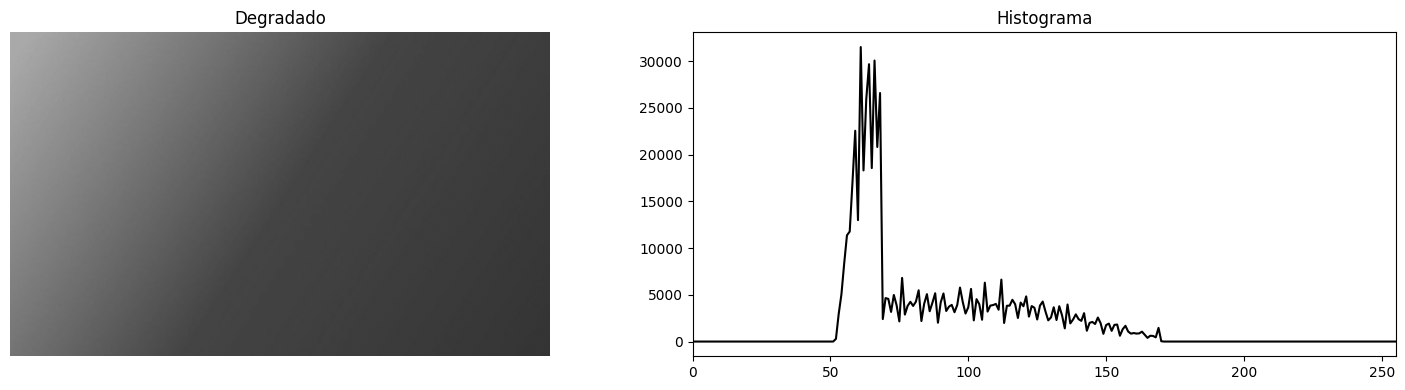

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

def mostrar(img, titulo):
    hist = np.histogram(img, bins=256, range=(0, 255))[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title(titulo)
    axs[0].axis('off')

    axs[1].plot(hist, color='black')
    axs[1].set_title("Histograma")
    axs[1].set_xlim(0, 255)

    plt.tight_layout()
    plt.show()

img1 = np.array(Image.open('./cl_1.jpg').convert('L'))
mostrar(img1, "Degradado")

In [25]:
# --- Ecualizar ---
def ecualizar_histograma(canal):
    hist, _ = np.histogram(canal.flatten(), bins=256, range=[0,255])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_normalized, 0).astype(np.uint8)
    return cdf_final[canal]

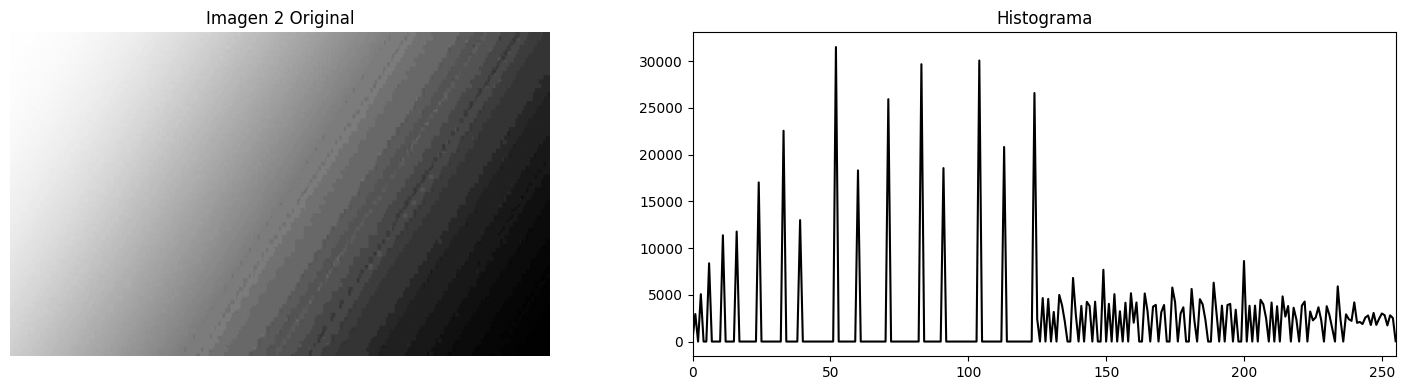

In [26]:
img2_gray=np.array(img1)
img2_gray=ecualizar_histograma(img2_gray)
img2_gray_eq=Image.fromarray(img2_gray)
mostrar(img2_gray_eq,"Imagen 2 Original")

Respuesta aqui

La imagen analizada no se beneficia del proceso de ecualización, ya que no presenta características de bajo contraste ni zonas con niveles de intensidad significativamente oscuros. Además, carece de regiones de interés relevantes, y su distribución tonal muestra una degradación uniforme en dirección diagonal. Como se observa en la figura, la aplicación de la ecualización no mejora la calidad visual, sino que introduce un efecto adverso al aumentar el ruido percibido, sin aportar información adicional apreciable.

En contraste, las imágenes que realmente se benefician de la ecualización del histograma son aquellas con un rango dinámico limitado —ya sea por tener un contraste extremadamente bajo o alto—, donde los detalles no son fácilmente distinguibles a simple vista. En estos casos, la ecualización permite redistribuir los niveles de intensidad, mejorando la visibilidad de las estructuras presentes y facilitando un análisis visual más detallado.

##### 2.2 Usando la imagen suministrada (cl_2). Realiza lo siguiente:

2.2.1 Muestra la imagen original en escala de grises y su histograma.
2.2.2 Aplica ecualización de histograma en escala de grises.
2.2.3 Muestra la imagen ecualizada y su nuevo histograma.
2.2.4 Compara visualmente los resultados: ¿qué mejoró? ¿qué no?
2.2.5 Implementa la ecualización de histograma en la imagen a color (sobre el canal Y usando YCbCr o sobre el canal V usando HSV).

In [27]:


def mostrar_rgb(img, titulo):
    img = np.array(img)
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    hist_r = np.histogram(r, bins=256, range=(0, 255))[0]
    hist_g = np.histogram(g, bins=256, range=(0, 255))[0]
    hist_b = np.histogram(b, bins=256, range=(0, 255))[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title(titulo)
    axs[0].axis('off')

    axs[1].plot(hist_r, color='red')
    axs[1].plot(hist_g, color='green')
    axs[1].plot(hist_b, color='blue')
    axs[1].set_title("Histograma")
    axs[1].set_xlim(0, 255)

    plt.tight_layout()
    plt.show()



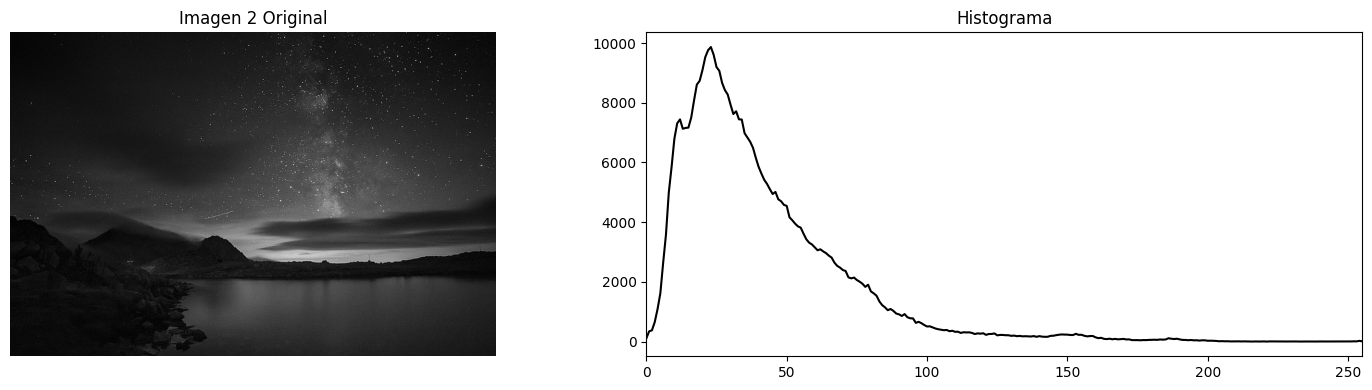

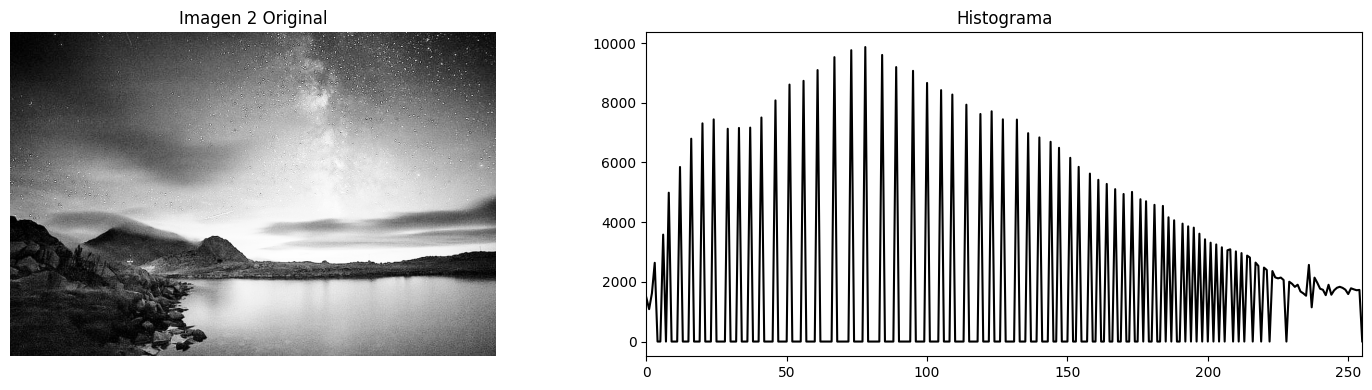

In [28]:
img2 = Image.open('./cl_2.jpg').convert('L')
mostrar(img2,"Imagen 2 Original")
img2_gray=np.array(img2)
img2_gray=ecualizar_histograma(img2_gray)
img2_gray_eq=Image.fromarray(img2_gray)
mostrar(img2_gray_eq,"Imagen 2 Original")




2.2.4 Al comparar ambas imágenes, se observa una mejora significativa en los relieves de las montañas, que ahora presentan una mayor definición y claridad debido al incremento del contraste. Esta mejora también se traduce en una imagen general más iluminada, con bordes más marcados y detalles más perceptibles en las regiones terrestres. 
No obstante, este mismo proceso de realce del contraste afectó negativamente a las regiones de bajo brillo, como el cielo estrellado. En particular, las estrellas perdieron intensidad y definición, lo que redujo su visibilidad y, en consecuencia, disminuyó la calidad visual de esa zona de la imagen.

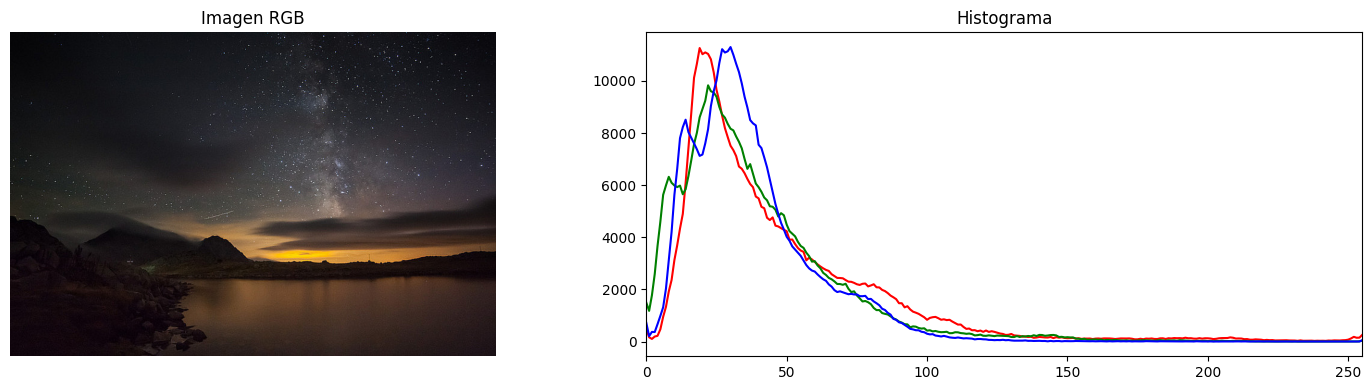

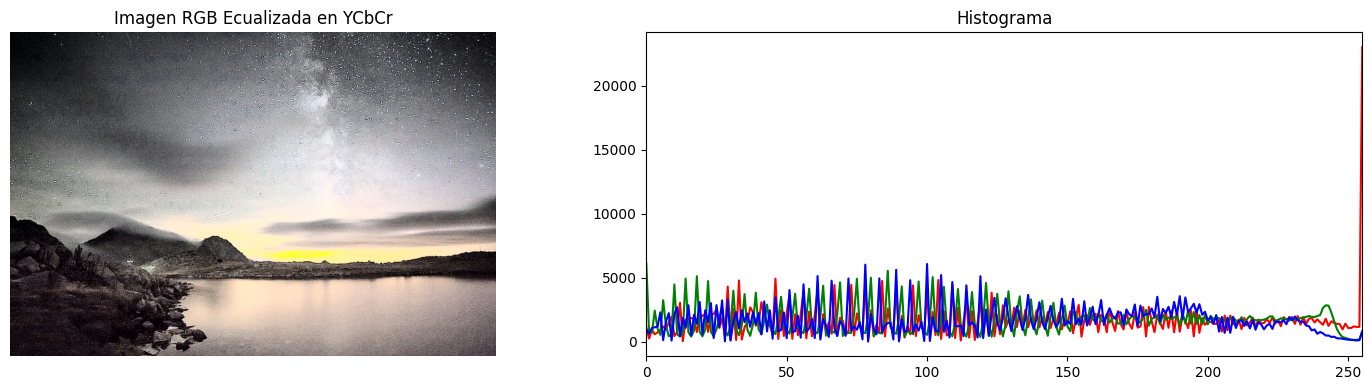

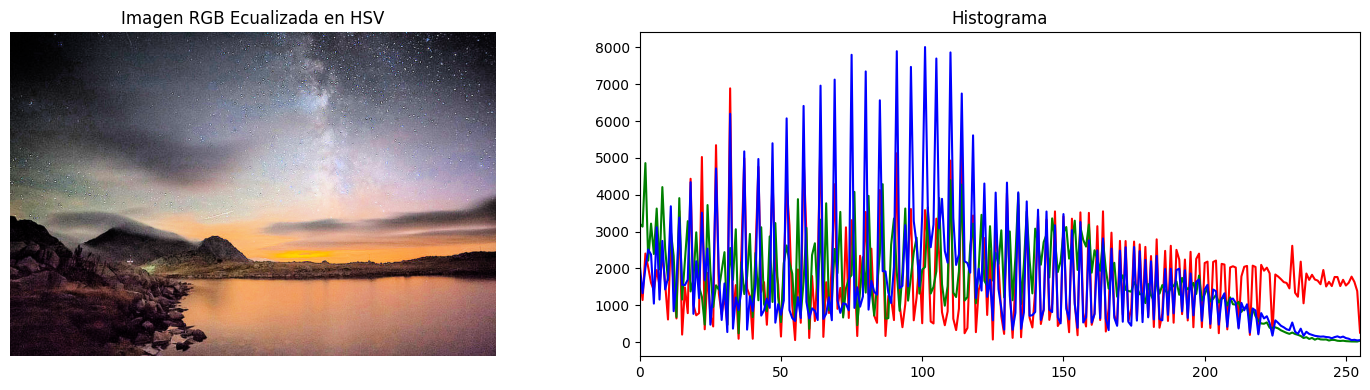

In [ ]:
img2 = Image.open('./cl_2.jpg').convert('RGB')
mostrar_rgb(img2,"Imagen RGB")
# --- Convertir imagen YCbCr  ---
img_ycbcr = img2.convert("YCbCr")
y, cb, cr = img_ycbcr.split()
# --- Ecualizar en Y ---
y_np = np.array(y)
y_eq = ecualizar_histograma(y_np)

# --- Recomponer imagen YCbCr y convertir a RGB ---
img_ycbcr_eq = Image.merge("YCbCr", (Image.fromarray(y_eq), cb, cr))
img_eq_rgb = img_ycbcr_eq.convert("RGB")
mostrar_rgb(img_eq_rgb,"Imagen RGB Ecualizada en YCbCr")
# --- Convertir imagen HSV  ---
img_ycbcr = img2.convert("HSV")
h, s, v = img_ycbcr.split()
# --- Ecualizar en Y ---
v_np = np.array(v)
v_eq = ecualizar_histograma(v_np)

# --- Recomponer imagen HSV y convertir a RGB ---
img_hsv_eq = Image.merge("HSV", (h ,s, Image.fromarray(v_eq)))
img_eq_rgb = img_hsv_eq.convert("RGB")
mostrar_rgb(img_eq_rgb,"Imagen RGB Ecualizada en HSV")